# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rusqi Ash Shiddieqy
- **Email:** muhammadrusqi10@gmail.com
- **ID Dicoding:** Muhammad Rusqi Ash Shiddieqy

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda kasual dan terdaftar di berbagai musim?
- Apakah terdapat pola penggunaan sepeda yang signifikan antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import library untuk manipulasi data
import numpy as np  # Untuk operasi matematika dan array
import pandas as pd # Untuk manipulasi dan analisis data

# Import library untuk visualisasi data
import matplotlib.pyplot as plt # Untuk membuat grafik dan visualisasi
import seaborn as sns # Untuk visualisasi statistik

# Import library untuk analisis statistik
import scipy.stats as stats # Untuk melakukan uji statistik
# Set default style untuk visualisasi
sns.set(style="whitegrid")

Pada tahap ini, saya mengimpor beberapa library yang akan digunakan dalam proses manipulasi data, visualisasi, dan analisis statistik:

- `numpy`: Digunakan untuk melakukan operasi matematika dan bekerja dengan array multidimensi. Ini sangat membantu dalam perhitungan numerik dan manipulasi data secara efisien.
- `pandas`: Library ini digunakan untuk manipulasi dan analisis data, terutama dalam bentuk tabel (*DataFrame*). Ini memudahkan pengolahan data yang kompleks seperti mengimpor, membersihkan, dan mengubah data.
- `matplotlib.pyplot`: Digunakan untuk membuat berbagai jenis grafik dan visualisasi. Ini memungkinkan saya untuk menampilkan data dalam bentuk visual yang lebih mudah dipahami.
- `seaborn`: Sebuah library untuk visualisasi data statistik yang menyediakan grafik yang lebih interaktif dan estetis dibandingkan dengan *matplotlib*. Pada baris ini, saya juga mengatur *default style* visualisasi dengan tema "whitegrid" agar grafik lebih mudah dibaca.
- `scipy.stats`: Digunakan untuk melakukan berbagai uji statistik seperti uji hipotesis, distribusi, dan perhitungan statistik lainnya yang diperlukan dalam analisis data.

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()
# Melihat 5 baris pertama dari data daily

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada tahap ini, saya mengimpor dataset yang berisi data harian (*daily data*) dari file CSV menggunakan `pandas`. File CSV diakses dari direktori tertentu dan disimpan dalam variabel `day_df` untuk dianalisis lebih lanjut. Setelah dataset dimuat, saya menampilkan 5 baris pertama dari data tersebut menggunakan fungsi `head()`. Ini bertujuan untuk melakukan inspeksi awal terhadap struktur data, seperti melihat kolom yang ada dan sampel datanya, guna memastikan data terbaca dengan benar sebelum proses analisis lebih lanjut.

In [ ]:
hour_df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Submission_Dicoding/hour.csv')
hour_df.head()
# Melihat 5 baris pertama dari data hourly

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada tahap ini, saya mengimpor dataset yang berisi data jam (*hourly data*) dari file CSV menggunakan `pandas`. File CSV diakses dari direktori tertentu dan disimpan dalam variabel `hour_df` untuk dianalisis lebih lanjut. Setelah dataset dimuat, saya menampilkan 5 baris pertama dari data tersebut menggunakan fungsi `head()`. Ini bertujuan untuk melakukan inspeksi awal terhadap struktur data, seperti melihat kolom yang ada dan sampel datanya, guna memastikan data terbaca dengan benar sebelum proses analisis lebih lanjut.

### Assessing Data

In [ ]:
day_df.info()
# Informasi umum tentang data daily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tahap ini, saya menggunakan fungsi `info()` untuk melihat informasi umum tentang dataset `day_df`. Fungsi ini memberikan ringkasan yang mencakup jumlah baris dan kolom, nama kolom, tipe data masing-masing kolom, serta jumlah nilai yang tidak kosong (*non-null*) di setiap kolom. Langkah ini penting untuk memahami struktur dataset secara keseluruhan, mengetahui apakah ada nilai yang hilang, dan memastikan tipe data setiap kolom sudah sesuai untuk analisis selanjutnya.


In [ ]:
day_df.describe()
# Statistik deskriptif untuk data daily

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada tahap ini, saya menggunakan fungsi `describe()` untuk menampilkan statistik deskriptif dari dataset `day_df`. Fungsi ini memberikan ringkasan statistik seperti jumlah total data (`count`), rata-rata (`mean`), standar deviasi (`std`), nilai minimum (`min`), kuartil pertama (25%), median atau kuartil kedua (50%), kuartil ketiga (75%), dan nilai maksimum (`max`) untuk setiap kolom numerik. Langkah ini berguna untuk mendapatkan gambaran awal mengenai distribusi data dan variasi dari masing-masing variabel, yang dapat membantu dalam analisis lebih lanjut.


In [ ]:
day_df.duplicated().sum()
# Memeriksa duplikasi data dalam data daily

0

Pada tahap ini, saya menggunakan fungsi `duplicated().sum()` untuk memeriksa apakah terdapat data yang duplikat dalam dataset `day_df`. Fungsi `duplicated()` akan menghasilkan nilai boolean untuk setiap baris yang menunjukkan apakah baris tersebut duplikat, dan fungsi `sum()` akan menghitung total jumlah baris duplikat yang ditemukan. Langkah ini penting untuk memastikan bahwa dataset tidak mengandung data yang sama secara berulang, yang bisa mempengaruhi hasil analisis jika tidak dibersihkan terlebih dahulu.


In [ ]:
day_df.isnull().sum()
# Memeriksa nilai yang hilang dalam data daily

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Pada tahap ini, saya menggunakan fungsi `isnull().sum()` untuk memeriksa nilai yang hilang (*missing values*) dalam dataset `day_df`. Fungsi `isnull()` akan mengidentifikasi setiap nilai yang hilang dengan nilai boolean, di mana `True` menunjukkan bahwa data tersebut hilang. Fungsi `sum()` kemudian digunakan untuk menghitung jumlah total nilai yang hilang di setiap kolom. Langkah ini penting untuk mengetahui apakah ada data yang perlu diimputasi atau dihapus untuk memastikan integritas dan kualitas data dalam analisis lebih lanjut.


In [ ]:
hour_df.info()
# Informasi umum tentang data hourly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tahap ini, saya menggunakan fungsi `info()` untuk melihat informasi umum tentang dataset `hour_df`, yang berisi data *hourly* (data per jam). Fungsi ini memberikan ringkasan detail, seperti jumlah total baris dan kolom, nama kolom, tipe data untuk setiap kolom, serta jumlah nilai yang tidak kosong (*non-null*) di masing-masing kolom. Informasi ini sangat penting untuk memahami struktur dataset secara keseluruhan, memastikan tipe data sudah sesuai, serta mengetahui apakah ada nilai yang hilang yang perlu diperhatikan sebelum melanjutkan ke tahap analisis lebih lanjut.


In [ ]:
hour_df.describe()
# Statistik deskriptif untuk data hourly

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap ini, saya menggunakan fungsi `describe()` untuk menampilkan statistik deskriptif dari dataset `hour_df`, yang berisi data *hourly* (per jam). Fungsi ini memberikan berbagai statistik seperti jumlah total data (`count`), rata-rata (`mean`), standar deviasi (`std`), nilai minimum (`min`), kuartil pertama (25%), median atau kuartil kedua (50%), kuartil ketiga (75%), dan nilai maksimum (`max`) untuk setiap kolom numerik dalam dataset. Statistik deskriptif ini membantu mendapatkan pemahaman awal mengenai distribusi data dan variasi antar variabel, serta menjadi dasar untuk analisis lanjutan.


In [ ]:
hour_df.duplicated().sum()
# Memeriksa duplikasi data dalam data hourly

0

Pada tahap ini, saya menggunakan fungsi `duplicated().sum()` untuk memeriksa apakah terdapat data yang duplikat dalam dataset `hour_df`. Fungsi `duplicated()` akan menghasilkan nilai boolean untuk setiap baris yang menunjukkan apakah baris tersebut duplikat, dan fungsi `sum()` akan menghitung total jumlah baris duplikat yang ditemukan. Langkah ini penting untuk memastikan bahwa dataset tidak mengandung data yang sama secara berulang, yang bisa mempengaruhi hasil analisis jika tidak dibersihkan terlebih dahulu.


In [ ]:
hour_df.isnull().sum()
# Memeriksa nilai yang hilang dalam data hourly

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Pada tahap ini, saya menggunakan fungsi `isnull().sum()` untuk memeriksa nilai yang hilang (*missing values*) dalam dataset `hour_df`. Fungsi `isnull()` akan mengidentifikasi setiap nilai yang hilang dengan nilai boolean, di mana `True` menunjukkan bahwa data tersebut hilang. Fungsi `sum()` kemudian digunakan untuk menghitung jumlah total nilai yang hilang di setiap kolom. Langkah ini penting untuk mengetahui apakah ada data yang perlu diimputasi atau dihapus untuk memastikan integritas dan kualitas data dalam analisis lebih lanjut.


### Cleaning Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tahap ini, saya melakukan inspeksi terhadap dataset `day_df` dengan menggunakan fungsi `info()` untuk melihat informasi umum mengenai data. Langkah ini merupakan bagian dari proses *data cleaning* untuk memeriksa struktur data, tipe data setiap kolom, dan jumlah nilai yang hilang atau kosong di setiap kolom. Hasil inspeksi ini membantu saya dalam memutuskan tindakan apa yang perlu dilakukan untuk membersihkan data, seperti menangani nilai yang hilang, mengonversi tipe data, atau menghapus data duplikat. Dengan memastikan data bersih dan terstruktur dengan baik, kualitas analisis yang dilakukan selanjutnya dapat lebih akurat dan reliabel.


In [ ]:
# Mengidentifikasi kolom yang perlu diubah menjadi tipe datetime
datetime_columns_day = ["dteday"]

# Ubah kolom menjadi tipe datetime
for column in datetime_columns_day:
    day_df[column] = pd.to_datetime(day_df[column])

# Memeriksa kolom kategori untuk dikonversi
categorical_columns_day = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']

# Ubah kolom kategori menjadi tipe kategori
for column in categorical_columns_day:
    day_df[column] = day_df[column].astype('category')

# Memeriksa tipe data setelah perubahan
print("\nTipe data di day_df setelah perbaikan:")
print(day_df.info())


Tipe data di day_df setelah perbaikan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64 

Pada tahap ini, saya melakukan beberapa perbaikan terhadap tipe data pada dataset `day_df` untuk memastikan data sesuai dengan format yang diperlukan dalam analisis:

1. **Mengubah Kolom ke Tipe `datetime`:**
   - Saya mengidentifikasi kolom `dteday` yang berisi informasi tanggal dan mengubahnya menjadi tipe `datetime` menggunakan fungsi `pd.to_datetime()`. Ini dilakukan agar kolom tanggal dapat digunakan dalam analisis berbasis waktu, seperti tren atau pola musiman.

2. **Mengubah Kolom Kategori ke Tipe `category`:**
   - Saya juga mengidentifikasi kolom-kolom seperti `season`, `weathersit`, `weekday`, `holiday`, dan `workingday` yang merupakan kolom dengan nilai kategori terbatas. Kolom-kolom ini diubah menjadi tipe data `category` menggunakan fungsi `astype('category')`. Perubahan ini bermanfaat untuk menghemat memori dan memungkinkan analisis yang lebih efisien dalam hal perhitungan statistik dan pengelompokan.

3. **Memeriksa Tipe Data Setelah Perubahan:**
   - Setelah perubahan dilakukan, saya memeriksa kembali struktur dataset dengan menggunakan fungsi `info()` untuk memastikan bahwa tipe data sudah sesuai. Langkah ini penting agar data siap digunakan dalam analisis berikutnya dan tidak ada kesalahan tipe data yang dapat mempengaruhi hasil analisis.


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada tahap ini, saya menggunakan fungsi `head()` untuk menampilkan 5 baris pertama dari dataset `day_df`. Langkah ini bertujuan untuk melihat sekilas struktur data, termasuk nama kolom dan contoh nilai di setiap kolom. Ini berguna untuk memastikan bahwa data telah dimuat dengan benar dan untuk mendapatkan pemahaman awal tentang bagaimana data terlihat. Dari sini, saya bisa menentukan langkah selanjutnya dalam proses *data cleaning*, seperti apakah ada kolom yang perlu diubah, diperbaiki, atau dihapus.


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap ini, saya menggunakan fungsi `describe()` untuk menampilkan statistik deskriptif dari dataset `hour_df`, yang berisi data per jam (*hourly data*). Statistik yang diberikan meliputi:

- **count**: Jumlah total data yang valid di setiap kolom.
- **mean**: Rata-rata dari nilai-nilai di setiap kolom.
- **std**: Standar deviasi, yang mengukur seberapa tersebar data dari rata-ratanya.
- **min**: Nilai minimum di setiap kolom.
- **25% (kuartil pertama)**: Nilai di bawah 25% data.
- **50% (median atau kuartil kedua)**: Nilai tengah yang memisahkan setengah data di bawah dan setengah data di atas.
- **75% (kuartil ketiga)**: Nilai di bawah 75% data.
- **max**: Nilai maksimum di setiap kolom.

Statistik deskriptif ini membantu memberikan gambaran awal tentang distribusi dan variabilitas data, serta memungkinkan saya untuk mengidentifikasi adanya potensi anomali atau pola dalam data sebelum melakukan analisis lebih lanjut.


In [ ]:
print("nilai rata-rata = {} & nilai maksimum cnt(jumlah peminjaman) = {}".format(hour_df['cnt'].mean(), hour_df['cnt'].max()))

nilai rata-rata = 189.46308763450142 & nilai maksimum cnt(jumlah peminjaman) = 977


Pada tahap ini, saya menggunakan fungsi `mean()` dan `max()` dari kolom `cnt` pada dataset `hour_df` untuk menghitung rata-rata dan nilai maksimum dari jumlah peminjaman (*cnt*).

- **`hour_df['cnt'].mean()`** menghitung nilai rata-rata dari jumlah peminjaman pada dataset *hourly*.
- **`hour_df['cnt'].max()`** mengambil nilai maksimum dari jumlah peminjaman.

Output dari perintah ini akan menampilkan dua informasi:
1. **Nilai rata-rata** dari jumlah peminjaman (cnt), yang memberikan gambaran tentang seberapa besar peminjaman rata-rata terjadi dalam satu periode waktu.
2. **Nilai maksimum** dari jumlah peminjaman (cnt), yang memberikan informasi tentang puncak tertinggi dari aktivitas peminjaman dalam dataset tersebut.

Langkah ini penting untuk mendapatkan wawasan awal tentang sebaran data dalam hal peminjaman dan dapat membantu dalam interpretasi atau pengambilan keputusan selanjutnya.


In [ ]:
cnt_mean = hour_df['cnt'].mean() # Hitung rata-rata untuk kolom cnt

threshold = 1.5 * cnt_mean # Tentukan ambang batas untuk anomali

# Identifikasi anomali
anomalies = hour_df[hour_df['cnt'] > threshold]
print(f"Jumlah anomali yang ditemukan: {len(anomalies)}")

# Hapus anomali dari dataset
hour_df_cleaned = hour_df[hour_df['cnt'] <= threshold]

# Verifikasi pembersihan
# Memeriksa statistik deskriptif setelah pembersihan
print("\nStatistik Deskriptif Setelah Pembersihan:")
print(hour_df_cleaned['cnt'].describe())

Jumlah anomali yang ditemukan: 4250

Statistik Deskriptif Setelah Pembersihan:
count    13129.000000
mean       104.234443
std         84.516668
min          1.000000
25%         24.000000
50%         89.000000
75%        173.000000
max        284.000000
Name: cnt, dtype: float64


Pada tahap ini, saya melakukan identifikasi dan pembersihan anomali dari dataset `hour_df` berdasarkan nilai jumlah peminjaman (*cnt*):

1. **Menghitung Rata-Rata Kolom `cnt`:**
   - Saya menghitung nilai rata-rata dari kolom `cnt` menggunakan fungsi `mean()`. Rata-rata ini digunakan sebagai acuan dalam menentukan batas ambang untuk mendeteksi anomali.

2. **Menentukan Ambang Batas Anomali:**
   - Saya menetapkan ambang batas untuk mendeteksi anomali dengan mengalikan rata-rata jumlah peminjaman dengan faktor 1.5. Nilai ini akan digunakan untuk mengidentifikasi data yang jauh di atas rata-rata, yang dianggap sebagai anomali.

3. **Identifikasi Anomali:**
   - Saya memfilter dataset `hour_df` untuk menemukan baris di mana nilai `cnt` melebihi ambang batas yang telah ditentukan. Baris-baris ini dianggap sebagai anomali dalam data peminjaman.

4. **Menghapus Anomali dari Dataset:**
   - Setelah anomali diidentifikasi, saya membuat dataset baru `hour_df_cleaned` dengan menghapus semua baris yang mengandung nilai `cnt` di atas ambang batas. Langkah ini bertujuan untuk membersihkan dataset dari data yang mungkin memengaruhi analisis secara negatif.

5. **Verifikasi Pembersihan:**
   - Setelah pembersihan, saya memeriksa statistik deskriptif dari kolom `cnt` pada dataset yang sudah dibersihkan menggunakan fungsi `describe()`. Ini memastikan bahwa anomali telah dihapus, dan data yang tersisa siap untuk dianalisis lebih lanjut dengan kualitas yang lebih baik.

Langkah ini sangat penting untuk memastikan bahwa data yang digunakan bebas dari nilai ekstrim yang dapat mempengaruhi hasil analisis, sehingga interpretasi yang didapat lebih akurat.


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tahap ini, saya menggunakan fungsi `info()` untuk menampilkan informasi umum tentang dataset `hour_df`. Informasi yang ditampilkan meliputi:

- **Jumlah total baris dan kolom**: Memberikan gambaran berapa banyak data yang dimiliki dalam dataset.
- **Nama kolom**: Menampilkan semua kolom yang ada dalam dataset, yang membantu memverifikasi bahwa dataset memiliki variabel yang diharapkan.
- **Tipe data** dari setiap kolom: Sangat penting untuk memastikan bahwa tipe data sesuai dengan yang diperlukan untuk analisis lebih lanjut. Misalnya, tipe data numerik (integer/float) dan kategori.
- **Jumlah nilai yang tidak kosong (*non-null*)** di setiap kolom: Ini membantu mendeteksi apakah ada nilai yang hilang dalam data yang perlu ditangani.

Langkah ini penting dalam proses eksplorasi data awal untuk memeriksa kesesuaian dan kualitas data sebelum melakukan pembersihan atau analisis lebih lanjut.


In [ ]:
# Mengidentifikasi kolom yang perlu diubah menjadi tipe datetime
datetime_columns_hour = ["dteday"]

# Ubah kolom menjadi tipe datetime
for column in datetime_columns_hour:
    hour_df[column] = pd.to_datetime(hour_df[column])

# Memeriksa kolom kategori untuk dikonversi
categorical_columns_hour = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']

# Ubah kolom kategori menjadi tipe kategori
for column in categorical_columns_hour:
    hour_df[column] = hour_df[column].astype('category')

# Memeriksa tipe data setelah perubahan
print("\nTipe data di hour_df setelah perbaikan:")
print(hour_df.info())


Tipe data di hour_df setelah perbaikan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  i

Pada tahap ini, saya melakukan beberapa perbaikan terhadap tipe data pada dataset `hour_df` untuk memastikan data sesuai dengan format yang diperlukan dalam analisis:

1. **Mengubah Kolom ke Tipe `datetime`:**
   - Saya mengidentifikasi kolom `dteday` yang berisi data tanggal dan mengubahnya menjadi tipe `datetime` menggunakan fungsi `pd.to_datetime()`. Perubahan ini dilakukan agar kolom tanggal bisa digunakan secara lebih efisien dalam analisis berbasis waktu, seperti menganalisis tren harian atau musiman.

2. **Mengubah Kolom Kategori ke Tipe `category`:**
   - Kolom-kolom seperti `season`, `weathersit`, `weekday`, `holiday`, dan `workingday` diubah menjadi tipe data `category`. Pengubahan ini menggunakan fungsi `astype('category')` untuk menghemat memori dan mempercepat komputasi, terutama dalam proses analisis statistik dan pengelompokan.

3. **Memeriksa Tipe Data Setelah Perubahan:**
   - Setelah perubahan dilakukan, saya memeriksa kembali tipe data dengan fungsi `info()` untuk memastikan bahwa tipe data sudah sesuai dan siap untuk dianalisis lebih lanjut.

Langkah ini penting untuk memastikan bahwa semua kolom dalam dataset memiliki tipe data yang tepat, yang akan mempermudah proses analisis serta meningkatkan efisiensi dan keakuratan dalam pengolahan data.


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada tahap ini, saya menggunakan fungsi `head()` untuk menampilkan 5 baris pertama dari dataset `hour_df`. Fungsi ini membantu melakukan inspeksi awal terhadap data, termasuk melihat nama kolom dan beberapa contoh nilai di setiap kolom. Langkah ini penting untuk:

- **Memastikan bahwa data telah dimuat dengan benar**.
- **Melihat bagaimana struktur data terlihat**, serta memahami representasi setiap variabel.
- **Mengidentifikasi apakah ada perubahan tipe data** yang sudah dilakukan (misalnya, konversi ke tipe `datetime` dan `category`) yang telah diterapkan dengan benar.

Melalui pemeriksaan awal ini, kita dapat memastikan bahwa dataset siap untuk dianalisis lebih lanjut, baik dari sisi kualitas data maupun kemudahan interpretasi.


## Menggabungkan data `day_df` dan `hour_df`

In [ ]:
# Menggabungkan tabel day_df dan hour_df
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="outer",
    left_on="dteday",  # Kolom yang digunakan dari hour_df
    right_on="dteday",  # Kolom yang digunakan dari day_df
    suffixes=('_hour', '_day')
)
day_hour_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Pada tahap ini, saya melakukan penggabungan dua dataset `hour_df` dan `day_df` menggunakan fungsi `pd.merge()`. Berikut adalah detail dari proses penggabungan:

1. **Menggunakan Metode `outer join`:**
   - Metode `outer join` digunakan untuk memastikan bahwa semua data dari kedua tabel akan dimasukkan, baik yang cocok maupun yang tidak. Jika ada data yang tidak memiliki pasangan di kedua tabel, nilai `NaN` akan diisi di tempat yang kosong.

2. **Kolom yang Digunakan untuk Penggabungan:**
   - Penggabungan dilakukan berdasarkan kolom `dteday` yang ada di kedua tabel. Kolom ini berisi data tanggal, yang menjadi kunci untuk menggabungkan data berdasarkan waktu.

3. **Suffixes untuk Kolom yang Sama:**
   - Karena ada beberapa kolom dengan nama yang sama di kedua dataset, saya menambahkan `suffixes` (`'_hour'` dan `'_day'`) untuk membedakan kolom yang berasal dari `hour_df` dan `day_df`. Ini penting agar tidak terjadi kebingungan saat melakukan analisis lebih lanjut.

4. **Pemeriksaan Awal Data Gabungan:**
   - Setelah penggabungan, saya menampilkan 5 baris pertama dari data gabungan menggunakan fungsi `head()` untuk memastikan bahwa data telah berhasil digabungkan dengan benar, termasuk verifikasi terhadap kolom-kolom yang memiliki nama serupa namun kini telah diberi akhiran yang berbeda (`_hour` dan `_day`).

Langkah ini penting untuk menyatukan informasi dari dua dataset yang berbeda namun saling melengkapi, sehingga analisis dapat dilakukan dengan mempertimbangkan data harian dan data per jam secara bersamaan.


In [ ]:
day_hour_df.nunique()  # Melihat jumlah nilai unik dalam setiap kolom

,0
instant_hour,17379
dteday,731
season_hour,4
yr_hour,2
mnth_hour,12
hr,24
holiday_hour,2
weekday_hour,7
workingday_hour,2
weathersit_hour,4


Pada tahap ini, saya menggunakan fungsi `nunique()` untuk menghitung jumlah nilai unik di setiap kolom dari dataset `day_hour_df`. Fungsi ini memberikan informasi tentang:

- **Berapa banyak nilai unik** yang terdapat dalam setiap kolom, yang penting untuk memahami variasi data dalam masing-masing variabel.
- **Identifikasi kolom kategori atau numerik** yang mungkin memiliki jumlah nilai unik yang rendah, misalnya kolom yang merepresentasikan kategori tertentu seperti musim (`season`) atau cuaca (`weathersit`).
- **Membantu mengidentifikasi anomali**: Jika sebuah kolom numerik ternyata memiliki nilai unik yang sangat sedikit, hal ini bisa menunjukkan adanya kesalahan atau pola tertentu yang perlu diperiksa lebih lanjut.

Dengan memahami jumlah nilai unik di setiap kolom, kita bisa mendapatkan wawasan awal tentang struktur dan distribusi data dalam dataset gabungan ini.


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada tahap ini, saya melakukan eksplorasi data dengan menggunakan fungsi `describe()` pada dataset `day_df`. Fungsi ini memberikan ringkasan statistik deskriptif untuk semua kolom, baik kolom numerik maupun kategori, dengan parameter `include="all"`. Berikut adalah beberapa poin penting yang diperoleh dari hasil analisis ini:

1. **Statistik Deskriptif untuk Kolom Numerik:**
   - Kolom numerik seperti `cnt`, `temp`, dan `hum` menunjukkan informasi seperti rata-rata (`mean`), standar deviasi (`std`), nilai minimum (`min`), nilai maksimum (`max`), serta distribusi kuartil (25%, 50%, 75%). Ini membantu memahami pola umum dan sebaran data dalam kolom-kolom tersebut.
   
2. **Statistik Deskriptif untuk Kolom Kategori:**
   - Kolom kategori seperti `season`, `weathersit`, `holiday`, dan `workingday` menunjukkan jumlah total nilai, jumlah kategori unik, serta kategori yang paling sering muncul (`top`) dan frekuensi kemunculannya (`freq`). Hal ini berguna untuk mengetahui distribusi dari variabel kategori.
   
3. **Nilai yang Hilang (*Missing Values*):**
   - Jika ada kolom yang memiliki nilai yang hilang, statistik deskriptif ini juga akan memberikan jumlah nilai kosong (`NaN`). Ini penting untuk memutuskan apakah perlu dilakukan imputasi atau pembersihan data lebih lanjut.

4. **Gambaran Umum Distribusi Data:**
   - Dengan ringkasan dari semua kolom, saya mendapatkan gambaran umum tentang bagaimana data didistribusikan di berbagai variabel, baik itu berupa variabel numerik maupun kategori.

Langkah ini merupakan bagian penting dari *Exploratory Data Analysis* (EDA) karena memberikan wawasan awal tentang dataset, yang akan membantu dalam menentukan langkah-langkah analisis berikutnya seperti visualisasi data atau pengujian hipotesis.


In [ ]:
day_df.groupby(by="season").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-24-3bc5ed9f1994>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


season     cnt                                      
         nunique   max   min         mean          std
0      1     179  7836   431  2604.132597  1399.942119
1      2     182  8362   795  4992.331522  1695.977235
2      3     188  8714  1115  5644.303191  1459.800381
3      4     176  8555    22  4728.162921  1699.615261

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `season` pada dataset `day_df` untuk mendapatkan informasi terkait jumlah peminjaman sepeda (*cnt*) di setiap musim. Saya menggunakan metode `groupby()` dan `agg()` untuk menghitung beberapa statistik deskriptif untuk variabel `cnt` dalam setiap musim.

Berikut adalah penjelasan dari output yang dihasilkan:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap musim. Ini menunjukkan seberapa bervariasi jumlah peminjaman sepeda di setiap musim.
2. **max**: Menunjukkan nilai maksimum dari jumlah peminjaman sepeda di setiap musim, yang memberi gambaran tentang puncak aktivitas peminjaman sepeda pada musim tersebut.
3. **min**: Menunjukkan nilai minimum dari jumlah peminjaman sepeda di setiap musim, sehingga kita bisa mengetahui kapan terjadi aktivitas peminjaman sepeda paling sedikit.
4. **mean**: Menghitung rata-rata jumlah peminjaman sepeda di setiap musim. Rata-rata ini memberikan gambaran umum tentang tren peminjaman sepeda pada musim tersebut.
5. **std**: Menghitung standar deviasi dari jumlah peminjaman sepeda, yang menunjukkan tingkat variasi atau penyebaran data dalam setiap musim. Semakin tinggi standar deviasi, semakin besar variasi peminjaman dalam musim tersebut.

Dengan hasil agregasi ini, kita bisa memahami pola peminjaman sepeda berdasarkan musim. Ini memberikan wawasan tentang tren penggunaan sepeda, apakah ada musim tertentu yang lebih banyak digunakan, serta melihat variabilitas jumlah peminjaman di setiap musim.


In [ ]:
day_df.groupby(by="yr").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

yr     cnt                                     
     nunique   max  min         mean          std
0  0     352  6043  431  3405.761644  1378.753666
1  1     356  8714   22  5599.934426  1788.667868

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `yr` (tahun) pada dataset `day_df` untuk memahami distribusi jumlah peminjaman sepeda (*cnt*) di setiap tahun. Saya menggunakan metode `groupby()` dan `agg()` untuk menghitung beberapa statistik deskriptif penting terkait jumlah peminjaman sepeda berdasarkan tahun.

Berikut adalah penjelasan dari metrik yang dihasilkan:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap tahun. Metrik ini menunjukkan tingkat variasi jumlah peminjaman sepeda dalam satu tahun, yang berguna untuk mengetahui seberapa bervariasi pola peminjaman sepeda pada tahun tersebut.
   
2. **max**: Menunjukkan nilai maksimum dari jumlah peminjaman sepeda pada tahun tersebut. Ini membantu kita melihat puncak aktivitas peminjaman sepeda dalam satu tahun, memberikan informasi tentang titik waktu ketika penggunaan sepeda mencapai puncaknya.

3. **min**: Menunjukkan nilai minimum dari jumlah peminjaman sepeda pada tahun tersebut. Nilai ini menunjukkan kapan terjadi aktivitas peminjaman sepeda paling sedikit dalam satu tahun.

4. **mean**: Rata-rata jumlah peminjaman sepeda per hari dalam setiap tahun. Rata-rata ini memberikan gambaran umum tentang tren peminjaman sepeda per tahun, apakah meningkat, menurun, atau stabil dari tahun ke tahun.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda per hari dalam setiap tahun. Standar deviasi mengukur seberapa tersebar data dari rata-ratanya. Semakin tinggi standar deviasi, semakin besar variasi dalam jumlah peminjaman di tahun tersebut.

Dengan hasil agregasi ini, kita bisa melihat bagaimana pola peminjaman sepeda berubah di setiap tahun. Analisis ini membantu memahami tren penggunaan sepeda dan variasinya dari tahun ke tahun, serta mengidentifikasi apakah ada pola kenaikan atau penurunan yang signifikan dalam peminjaman sepeda sepanjang waktu.


In [ ]:
day_df.groupby(by="mnth").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

mnth     cnt                                      
        nunique   max   min         mean          std
0     1      62  4521   431  2176.338710  1161.674370
1     2      57  5062  1005  2655.298246  1145.313307
2     3      60  8362   605  3692.258065  1899.301812
3     4      60  7460   795  4484.900000  1776.160778
4     5      62  8294  2633  5349.774194  1298.711561
5     6      60  8120  3767  5772.366667  1240.400031
6     7      62  8173  3285  5563.677419  1273.751871
7     8      62  7865  1115  5664.419355  1494.516146
8     9      60  8714  1842  5766.516667  1810.130649
9    10      62  8156    22  5199.225806  1988.392517
10   11      60  6852  1495  4247.183333  1285.712709
11   12      62  6606   441  3403.806452  1549.639353

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `mnth` (bulan) pada dataset `day_df` untuk mendapatkan wawasan terkait distribusi jumlah peminjaman sepeda (*cnt*) di setiap bulan. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap bulan. Ini membantu mengetahui variasi dalam peminjaman sepeda setiap bulan, serta apakah ada bulan dengan pola yang lebih stabil atau beragam dalam peminjaman.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap bulan. Ini menunjukkan jumlah peminjaman tertinggi yang terjadi di bulan tersebut, memberikan informasi tentang kapan peminjaman sepeda mencapai puncaknya.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap bulan. Ini membantu melihat kapan peminjaman sepeda paling sedikit dalam bulan tersebut.

4. **mean**: Rata-rata jumlah peminjaman sepeda di setiap bulan. Nilai ini memberikan gambaran umum tentang tren rata-rata peminjaman sepeda di bulan tersebut, sehingga kita bisa melihat pola musiman penggunaan sepeda (apakah ada bulan-bulan tertentu di mana penggunaan lebih tinggi atau lebih rendah).

5. **std**: Standar deviasi jumlah peminjaman sepeda di setiap bulan. Ini mengukur variasi dalam jumlah peminjaman sepeda di bulan tersebut. Standar deviasi yang lebih tinggi menunjukkan adanya fluktuasi yang lebih besar dalam jumlah peminjaman.

Dengan analisis ini, kita dapat memahami bagaimana peminjaman sepeda berfluktuasi setiap bulan, melihat tren musiman, serta mengidentifikasi bulan-bulan yang menunjukkan variasi penggunaan yang signifikan. Analisis ini sangat berguna untuk melihat pola tahunan dalam penggunaan sepeda.


In [ ]:
day_df.groupby(by="weekday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-27-a585c26591db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday").agg({


weekday     cnt                                      
          nunique   max   min         mean          std
0       0     104  8227   605  4228.828571  1872.496629
1       1     104  7525    22  4338.123810  1793.074013
2       2     104  7767   683  4510.663462  1826.911642
3       3     103  8173   441  4548.538462  2038.095884
4       4     103  7804   431  4667.259615  1939.433317
5       5     104  8362  1167  4690.288462  1874.624870
6       6     102  8714   627  4550.542857  2196.693009

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `weekday` (hari dalam seminggu) pada dataset `day_df` untuk memahami distribusi jumlah peminjaman sepeda (*cnt*) setiap hari dalam seminggu. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap hari dalam seminggu. Ini menunjukkan variasi jumlah peminjaman sepeda pada setiap hari, apakah ada hari tertentu dengan pola peminjaman yang lebih stabil atau lebih bervariasi.

2. **max**: Menunjukkan nilai maksimum dari jumlah peminjaman sepeda di setiap hari. Ini membantu mengidentifikasi hari dalam seminggu ketika peminjaman sepeda mencapai puncaknya.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap hari. Ini menunjukkan kapan terjadi aktivitas peminjaman paling sedikit pada hari-hari tertentu.

4. **mean**: Rata-rata jumlah peminjaman sepeda di setiap hari dalam seminggu. Nilai rata-rata ini memberikan gambaran tentang pola umum peminjaman sepeda selama seminggu, misalnya apakah lebih banyak peminjaman terjadi pada hari kerja dibandingkan akhir pekan atau sebaliknya.

5. **std**: Standar deviasi jumlah peminjaman sepeda di setiap hari, yang menunjukkan tingkat variasi peminjaman sepeda pada hari tersebut. Standar deviasi yang tinggi menunjukkan fluktuasi yang lebih besar dalam peminjaman, sedangkan standar deviasi yang rendah menunjukkan peminjaman yang lebih konsisten.

Dengan analisis ini, kita bisa memahami bagaimana peminjaman sepeda berfluktuasi dalam satu minggu, melihat apakah ada pola yang berbeda antara hari kerja dan akhir pekan, serta mengetahui hari-hari dengan variasi penggunaan sepeda yang signifikan.


In [ ]:
day_df.groupby(by="workingday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-28-723e2e189bef>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="workingday").agg({


workingday     cnt                                     
             nunique   max  min         mean          std
0          0     223  8714  605  4330.168831  2052.141245
1          1     487  8362   22  4584.820000  1878.415583

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `workingday` (hari kerja) pada dataset `day_df` untuk melihat bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi antara hari kerja dan hari non-kerja. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif sebagai berikut:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap kategori hari kerja (0 untuk non-kerja, 1 untuk hari kerja). Ini menunjukkan seberapa bervariasi jumlah peminjaman sepeda pada hari kerja dan hari non-kerja.

2. **max**: Menunjukkan nilai maksimum dari jumlah peminjaman sepeda pada hari kerja dan hari non-kerja. Ini membantu mengidentifikasi puncak aktivitas peminjaman sepeda pada hari-hari tersebut.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda pada hari kerja dan non-kerja. Ini menunjukkan kapan aktivitas peminjaman paling sedikit terjadi pada kedua jenis hari ini.

4. **mean**: Rata-rata jumlah peminjaman sepeda pada hari kerja dan non-kerja. Ini memberikan wawasan tentang apakah lebih banyak sepeda dipinjam pada hari kerja atau hari non-kerja, memberikan gambaran tentang pola penggunaan sepeda terkait dengan jadwal kerja.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda pada hari kerja dan non-kerja. Ini mengukur seberapa besar variasi dalam peminjaman sepeda di kedua kategori ini. Standar deviasi yang lebih tinggi menunjukkan adanya fluktuasi besar dalam peminjaman.

Dengan analisis ini, kita dapat memahami pola penggunaan sepeda yang berbeda antara hari kerja dan hari non-kerja. Ini dapat membantu mengetahui apakah aktivitas peminjaman lebih tinggi pada hari-hari kerja, ketika orang mungkin menggunakan sepeda untuk bepergian ke tempat kerja, atau pada hari-hari non-kerja, ketika sepeda digunakan untuk rekreasi atau aktivitas lain.


In [ ]:
day_df.groupby(by="holiday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-29-139fda2c12a3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="holiday").agg({


holiday     cnt                                      
          nunique   max   min         mean          std
0       0     679  8714    22  4527.104225  1929.013947
1       1      20  7403  1000  3735.000000  2103.350660

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `holiday` (hari libur) pada dataset `day_df` untuk melihat bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi pada hari libur dan hari biasa. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif sebagai berikut:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk hari libur (0 untuk hari biasa, 1 untuk hari libur). Ini menunjukkan variasi jumlah peminjaman sepeda pada hari libur dibandingkan dengan hari biasa.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini membantu mengidentifikasi puncak aktivitas peminjaman sepeda pada hari libur dan hari biasa.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini menunjukkan kapan terjadi aktivitas peminjaman paling sedikit pada kedua kategori hari tersebut.

4. **mean**: Rata-rata jumlah peminjaman sepeda pada hari libur dan hari biasa. Nilai ini memberikan wawasan tentang apakah jumlah peminjaman lebih tinggi pada hari libur, ketika orang cenderung melakukan aktivitas rekreasi, atau pada hari biasa.

5. **std**: Standar deviasi jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini mengukur variasi dalam peminjaman sepeda di kedua jenis hari ini. Standar deviasi yang tinggi menunjukkan fluktuasi besar dalam aktivitas peminjaman sepeda.

Dengan hasil agregasi ini, kita dapat melihat bagaimana peminjaman sepeda bervariasi antara hari libur dan hari biasa, memberikan wawasan tentang perbedaan perilaku penggunaan sepeda pada saat hari libur versus hari kerja atau biasa.


In [ ]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-30-0c0e5e1f886b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weathersit").agg({


weathersit     cnt                                     
             nunique   max  min         mean          std
0          1     451  8714  431  4876.786177  1879.483989
1          2     243  8362  605  4035.862348  1809.109918
2          3      21  4639   22  1803.285714  1240.284449

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `weathersit` (situasi cuaca) pada dataset `day_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi di bawah berbagai kondisi cuaca. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif sebagai berikut:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap kategori cuaca. Kategori cuaca biasanya berkisar dari kondisi cuaca cerah hingga hujan atau salju. Metrik ini menunjukkan seberapa bervariasi jumlah peminjaman sepeda dalam setiap kondisi cuaca.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda dalam setiap kondisi cuaca. Ini membantu mengidentifikasi puncak aktivitas peminjaman sepeda di berbagai kondisi cuaca, seperti apakah peminjaman lebih tinggi pada hari-hari cerah atau menurun tajam saat cuaca buruk.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda dalam setiap kondisi cuaca. Ini menunjukkan kapan terjadi aktivitas peminjaman paling sedikit di setiap kategori cuaca.

4. **mean**: Rata-rata jumlah peminjaman sepeda dalam setiap kondisi cuaca. Nilai rata-rata ini memberikan wawasan tentang apakah lebih banyak sepeda dipinjam pada cuaca cerah atau bagaimana cuaca memengaruhi peminjaman secara umum.

5. **std**: Standar deviasi jumlah peminjaman sepeda di setiap kondisi cuaca. Ini mengukur variasi peminjaman sepeda di berbagai cuaca. Standar deviasi yang lebih tinggi menunjukkan fluktuasi yang lebih besar dalam jumlah peminjaman sepeda untuk kondisi cuaca tertentu.

Dengan hasil agregasi ini, kita bisa melihat bagaimana situasi cuaca memengaruhi pola penggunaan sepeda. Misalnya, kita mungkin melihat bahwa jumlah peminjaman cenderung lebih tinggi pada hari-hari cerah dan lebih rendah pada cuaca buruk seperti hujan atau salju, serta bagaimana besar variasi penggunaan sepeda tergantung pada kondisi cuaca.


### Explore `hour_df`

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap ini, saya menggunakan fungsi `describe(include="all")` pada dataset `hour_df` untuk menampilkan statistik deskriptif yang komprehensif dari semua kolom, baik numerik maupun kategori. Berikut adalah beberapa poin penting dari hasil analisis ini:

1. **Statistik Deskriptif untuk Kolom Numerik:**
   - Untuk kolom-kolom numerik seperti `cnt` (jumlah peminjaman sepeda per jam), `temp` (suhu), dan `hum` (kelembaban), fungsi ini memberikan metrik seperti:
     - **count**: Jumlah total data yang tidak kosong.
     - **mean**: Nilai rata-rata dari setiap kolom.
     - **std**: Standar deviasi, yang menunjukkan seberapa besar data tersebar dari rata-ratanya.
     - **min**: Nilai minimum.
     - **25%, 50%, 75%**: Kuartil pertama, median (kuartil kedua), dan kuartil ketiga.
     - **max**: Nilai maksimum.
   
2. **Statistik Deskriptif untuk Kolom Kategori:**
   - Untuk kolom kategori seperti `season`, `weathersit`, `weekday`, `holiday`, dan `workingday`, statistik deskriptif mencakup:
     - **count**: Jumlah total data yang tidak kosong.
     - **unique**: Jumlah nilai unik di setiap kolom.
     - **top**: Nilai yang paling sering muncul dalam kolom tersebut.
     - **freq**: Frekuensi kemunculan nilai yang paling sering muncul.

3. **Identifikasi Nilai yang Hilang (Missing Values):**
   - Jika ada nilai yang hilang dalam dataset, statistik deskriptif ini juga akan mengidentifikasi berapa banyak nilai kosong (`NaN`) yang ada di setiap kolom. Ini penting untuk mengetahui apakah perlu dilakukan pembersihan data lebih lanjut.

4. **Pemahaman Awal Data:**
   - Statistik ini membantu memberikan pemahaman awal tentang distribusi data, baik numerik maupun kategori. Dengan informasi ini, kita bisa mulai melihat pola umum dalam dataset, seperti distribusi suhu, jumlah peminjaman per jam, dan bagaimana kondisi cuaca atau hari dalam seminggu memengaruhi peminjaman sepeda.

Analisis deskriptif ini sangat penting dalam *Exploratory Data Analysis* (EDA) untuk mendapatkan wawasan awal tentang dataset dan mempersiapkan data untuk analisis lebih lanjut.


In [ ]:
hour_df.groupby(by="season").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-32-50b01bcbdcb4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season").agg({


season     cnt                                 
         nunique  max min        mean         std
0      1     482  801   1  111.114569  119.224010
1      2     721  957   1  208.344069  188.362473
2      3     760  977   1  236.016237  197.711630
3      4     690  967   1  198.868856  182.967972

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `season` (musim) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi di setiap musim. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting sebagai berikut:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap musim. Ini memberikan informasi tentang seberapa bervariasi jumlah peminjaman sepeda di setiap musim, yang penting untuk mengetahui apakah ada musim tertentu dengan pola peminjaman yang lebih seragam atau bervariasi.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap musim. Ini membantu kita melihat puncak aktivitas peminjaman sepeda di musim tertentu, misalnya apakah peminjaman sepeda lebih tinggi di musim semi atau musim panas.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap musim. Nilai ini menunjukkan kapan peminjaman sepeda paling sedikit dalam setiap musim.

4. **mean**: Rata-rata jumlah peminjaman sepeda di setiap musim. Ini memberikan wawasan tentang bagaimana tren rata-rata peminjaman sepeda berubah dari musim ke musim, apakah ada musim tertentu dengan penggunaan sepeda yang lebih intens.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda di setiap musim. Standar deviasi yang lebih tinggi menunjukkan bahwa ada fluktuasi yang lebih besar dalam jumlah peminjaman sepeda selama musim tersebut, sementara standar deviasi yang lebih rendah menunjukkan bahwa peminjaman sepeda lebih konsisten.

Dengan hasil agregasi ini, kita dapat memahami pola penggunaan sepeda berdasarkan musim, melihat apakah musim tertentu memiliki peningkatan atau penurunan jumlah peminjaman, serta variasi dalam aktivitas peminjaman sepeda sepanjang tahun.


In [ ]:
hour_df.groupby(by="yr").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

yr     cnt                                 
     nunique  max min        mean         std
0  0     585  651   1  143.794448  133.797854
1  1     866  977   1  234.666361  208.910941

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `yr` (tahun) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi di setiap tahun. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap tahun. Ini memberikan informasi tentang seberapa bervariasi jumlah peminjaman sepeda di tahun tertentu, apakah ada pola yang stabil atau tidak.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap tahun. Ini membantu mengidentifikasi puncak aktivitas peminjaman sepeda pada tahun tersebut, apakah ada lonjakan peminjaman pada waktu tertentu dalam satu tahun.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap tahun. Ini memberikan wawasan kapan peminjaman sepeda paling sedikit terjadi, dan apakah ada periode waktu tertentu dalam tahun tersebut ketika peminjaman sepeda sangat rendah.

4. **mean**: Rata-rata jumlah peminjaman sepeda per jam di setiap tahun. Nilai ini memberikan gambaran umum tentang bagaimana tren rata-rata peminjaman sepeda berubah dari tahun ke tahun.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda di setiap tahun. Standar deviasi yang lebih tinggi menunjukkan adanya variasi besar dalam jumlah peminjaman sepeda selama tahun tersebut, sementara standar deviasi yang lebih rendah menunjukkan penggunaan sepeda yang lebih konsisten.

Dengan hasil agregasi ini, kita dapat melihat bagaimana pola penggunaan sepeda berubah dari tahun ke tahun. Analisis ini dapat membantu mengidentifikasi tren jangka panjang dalam peminjaman sepeda, seperti apakah jumlah peminjaman meningkat atau menurun, serta variasi dalam aktivitas peminjaman sepanjang tahun.


In [ ]:
hour_df.groupby(by="mnth").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

mnth     cnt                                 
        nunique  max min        mean         std
0     1     314  559   1   94.424773   99.907146
1     2     343  610   1  112.865026  112.486565
2     3     440  957   1  155.410726  163.543050
3     4     502  822   1  187.260960  181.137902
4     5     551  873   1  222.907258  187.721497
5     6     558  900   1  240.515278  196.038950
6     7     551  913   1  231.819892  187.483806
7     8     560  941   1  238.097627  200.444648
8     9     557  977   1  240.773138  214.609531
9    10     535  963   1  222.158511  203.477057
10   11     480  729   1  177.335421  158.973887
11   12     428  759   1  142.303439  141.080674

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `mnth` (bulan) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi di setiap bulan. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap bulan. Ini menunjukkan seberapa bervariasi jumlah peminjaman sepeda di setiap bulan, apakah ada bulan tertentu yang lebih stabil atau bervariasi dalam peminjaman sepeda.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap bulan. Ini membantu mengidentifikasi kapan peminjaman sepeda mencapai puncaknya, memberikan wawasan apakah ada bulan tertentu dengan aktivitas peminjaman yang sangat tinggi.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap bulan. Ini menunjukkan kapan peminjaman sepeda paling sedikit terjadi di masing-masing bulan.

4. **mean**: Rata-rata jumlah peminjaman sepeda di setiap bulan. Ini memberikan gambaran umum tentang pola peminjaman sepeda berdasarkan bulan, apakah ada musim atau bulan tertentu yang cenderung lebih banyak peminjaman.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda di setiap bulan. Ini mengukur seberapa besar variasi dalam jumlah peminjaman di setiap bulan. Standar deviasi yang tinggi menunjukkan fluktuasi besar dalam aktivitas peminjaman selama bulan tersebut.

Dengan analisis ini, kita dapat melihat bagaimana pola peminjaman sepeda berubah setiap bulan dan apakah ada tren musiman dalam penggunaan sepeda. Informasi ini membantu mengidentifikasi bulan-bulan dengan penggunaan sepeda tertinggi dan fluktuasi aktivitas peminjaman selama satu tahun.


In [ ]:
hour_df.groupby(by="weekday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-35-005e9637f395>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday").agg({


weekday     cnt                                 
          nunique  max min        mean         std
0       0     571  776   1  177.468825  168.167710
1       1     595  968   1  183.744655  179.514167
2       2     598  970   1  191.238891  187.820480
3       3     616  977   1  191.130505  190.894464
4       4     606  976   1  196.436665  188.011923
5       5     584  957   1  196.135907  174.076894
6       6     609  783   1  190.209793  179.820569

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `weekday` (hari dalam seminggu) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi setiap hari dalam seminggu. Menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap hari dalam seminggu. Ini menunjukkan seberapa bervariasi jumlah peminjaman sepeda pada setiap hari, apakah ada hari tertentu dengan pola yang lebih stabil atau lebih bervariasi.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap hari dalam seminggu. Ini membantu mengidentifikasi kapan peminjaman sepeda mencapai puncaknya, apakah pada hari kerja atau akhir pekan.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap hari. Ini menunjukkan kapan peminjaman sepeda paling sedikit terjadi pada hari tertentu dalam seminggu.

4. **mean**: Rata-rata jumlah peminjaman sepeda di setiap hari dalam seminggu. Ini memberikan gambaran umum tentang apakah lebih banyak sepeda dipinjam pada hari kerja atau akhir pekan, atau apakah ada pola tertentu pada hari tertentu.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda di setiap hari dalam seminggu. Ini mengukur seberapa besar variasi dalam jumlah peminjaman sepeda di hari-hari tersebut. Standar deviasi yang lebih tinggi menunjukkan adanya fluktuasi yang lebih besar, sementara standar deviasi yang lebih rendah menunjukkan pola yang lebih stabil.

Dengan hasil agregasi ini, kita bisa memahami bagaimana pola peminjaman sepeda berubah dari Senin hingga Minggu, melihat apakah ada perbedaan signifikan antara hari kerja dan akhir pekan, serta mengetahui variasi peminjaman sepeda di setiap hari.


In [ ]:
hour_df.groupby(by="workingday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-36-4468f4a4b5cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="workingday").agg({


workingday     cnt                                 
             nunique  max min        mean         std
0          0     676  783   1  181.405332  172.853832
1          1     856  977   1  193.207754  185.107477

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `workingday` (hari kerja) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi antara hari kerja dan hari non-kerja. Dengan menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk hari kerja (1) dan hari non-kerja (0). Ini membantu melihat seberapa bervariasi jumlah peminjaman sepeda pada hari kerja dibandingkan dengan hari non-kerja.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda pada hari kerja dan hari non-kerja. Ini mengidentifikasi puncak aktivitas peminjaman sepeda di kedua jenis hari, sehingga kita bisa melihat apakah peminjaman lebih tinggi pada hari kerja atau hari libur.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda pada hari kerja dan hari non-kerja. Ini menunjukkan kapan peminjaman sepeda paling sedikit terjadi pada kedua jenis hari tersebut.

4. **mean**: Rata-rata jumlah peminjaman sepeda pada hari kerja dan hari non-kerja. Ini memberikan wawasan tentang apakah lebih banyak sepeda dipinjam pada hari kerja dibandingkan hari non-kerja atau sebaliknya.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda pada hari kerja dan hari non-kerja. Ini mengukur variasi jumlah peminjaman sepeda di kedua jenis hari. Standar deviasi yang tinggi menunjukkan fluktuasi besar dalam peminjaman sepeda.

Dengan hasil agregasi ini, kita dapat melihat pola penggunaan sepeda yang berbeda antara hari kerja dan hari non-kerja. Ini berguna untuk mengetahui apakah ada peningkatan aktivitas peminjaman pada hari kerja karena sepeda mungkin digunakan untuk keperluan transportasi, atau apakah peminjaman lebih tinggi pada hari non-kerja karena sepeda digunakan untuk rekreasi.


In [ ]:
hour_df.groupby(by="holiday").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-37-4551cc75bbb3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="holiday").agg({


holiday     cnt                                
          nunique  max min       mean         std
0       0     869  977   1  190.42858  181.981435
1       1     276  712   1  156.87000  156.757478

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `holiday` (hari libur) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi antara hari libur dan hari biasa. Dengan menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk hari libur (1) dan hari biasa (0). Ini membantu melihat seberapa bervariasi jumlah peminjaman sepeda pada hari libur dibandingkan hari biasa.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini menunjukkan puncak aktivitas peminjaman sepeda di kedua jenis hari, sehingga kita bisa melihat apakah peminjaman sepeda lebih tinggi pada hari libur atau hari biasa.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini memberikan wawasan tentang kapan peminjaman sepeda paling sedikit terjadi di kedua jenis hari.

4. **mean**: Rata-rata jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini memberikan gambaran apakah lebih banyak sepeda dipinjam pada hari libur atau hari biasa.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda pada hari libur dan hari biasa. Ini mengukur seberapa besar variasi peminjaman sepeda di kedua jenis hari. Standar deviasi yang tinggi menunjukkan fluktuasi besar dalam jumlah peminjaman.

Dengan hasil agregasi ini, kita dapat memahami bagaimana pola penggunaan sepeda berubah antara hari libur dan hari biasa. Ini berguna untuk melihat apakah hari libur meningkatkan aktivitas peminjaman sepeda, misalnya, karena orang memiliki lebih banyak waktu untuk rekreasi.


In [ ]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["nunique", "max", "min", "mean", "std"]
}).reset_index()

<ipython-input-38-d1bf436b316e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weathersit").agg({


weathersit     cnt                                 
             nunique  max min        mean         std
0          1     848  977   1  204.869272  189.487773
1          2     649  957   1  175.165493  165.431589
2          3     368  891   1  111.579281  133.781045
3          4       3  164  23   74.333333   77.925178

Pada tahap ini, saya melakukan analisis agregat berdasarkan kolom `weathersit` (situasi cuaca) pada dataset `hour_df` untuk memahami bagaimana jumlah peminjaman sepeda (*cnt*) bervariasi di bawah berbagai kondisi cuaca. Dengan menggunakan metode `groupby()` dan `agg()`, saya menghitung beberapa statistik deskriptif penting:

1. **nunique**: Menghitung jumlah nilai unik dalam kolom `cnt` untuk setiap kondisi cuaca. Ini memberikan wawasan tentang seberapa bervariasi jumlah peminjaman sepeda pada setiap situasi cuaca.

2. **max**: Nilai maksimum dari jumlah peminjaman sepeda di setiap kondisi cuaca. Ini menunjukkan kapan peminjaman sepeda mencapai puncaknya untuk berbagai kondisi cuaca, seperti cuaca cerah atau hujan.

3. **min**: Nilai minimum dari jumlah peminjaman sepeda di setiap kondisi cuaca. Ini memberikan informasi tentang kapan peminjaman sepeda paling sedikit terjadi di setiap kondisi cuaca.

4. **mean**: Rata-rata jumlah peminjaman sepeda dalam setiap kondisi cuaca. Ini memberikan gambaran umum tentang bagaimana rata-rata peminjaman sepeda berubah berdasarkan cuaca, apakah ada lebih banyak peminjaman pada cuaca cerah dibandingkan cuaca buruk.

5. **std**: Standar deviasi dari jumlah peminjaman sepeda di setiap kondisi cuaca. Ini mengukur variasi dalam jumlah peminjaman sepeda di setiap situasi cuaca. Standar deviasi yang lebih tinggi menunjukkan fluktuasi besar dalam peminjaman sepeda di cuaca tertentu.

Dengan hasil agregasi ini, kita dapat memahami bagaimana kondisi cuaca memengaruhi pola peminjaman sepeda. Cuaca cerah cenderung mendukung peningkatan penggunaan sepeda, sementara cuaca buruk seperti hujan atau salju mungkin menyebabkan penurunan aktivitas peminjaman sepeda.


## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda kasual dan terdaftar di berbagai musim?

In [ ]:
day_hour_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Visualization & Explanatory Analysis

**Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda kasual dan terdaftar di berbagai musim?**

Pada tahap ini, saya akan melakukan analisis untuk melihat pengaruh cuaca terhadap jumlah pengguna sepeda kasual (*casual*) dan terdaftar (*registered*) di berbagai musim. Data dari dataset `day_hour_df`, yang menggabungkan informasi dari *hourly* dan *daily*, digunakan untuk menjawab pertanyaan ini.

 Langkah-langkah Analisis:
1. **Menggabungkan Dataset:**
   Dataset `day_hour_df` merupakan hasil gabungan antara data harian dan data per jam, yang mencakup informasi seperti cuaca (`weathersit`), musim (`season`), jumlah pengguna kasual dan terdaftar, serta faktor cuaca lainnya.

2. **Menyegmentasi Data Berdasarkan Cuaca dan Musim:**
   Saya akan membagi data berdasarkan kondisi cuaca (`weathersit`) dan musim (`season`) untuk melihat apakah ada perubahan signifikan dalam jumlah pengguna kasual dan terdaftar di bawah berbagai kondisi cuaca (seperti cerah, mendung, hujan) dan di setiap musim (musim semi, panas, gugur, dingin).

3. **Visualisasi Data:**
   Saya akan membuat visualisasi data untuk menggambarkan distribusi jumlah pengguna kasual dan terdaftar di setiap kondisi cuaca dan musim. Grafik yang akan digunakan adalah:
   - **Bar Chart** atau **Box Plot** untuk menunjukkan variasi jumlah pengguna kasual dan terdaftar di setiap musim dan kondisi cuaca.
   - **Line Chart** untuk melihat tren pengguna kasual dan terdaftar secara keseluruhan di sepanjang musim dan kondisi cuaca yang berbeda.

4. **Penjelasan Tentang Pengaruh Cuaca:**
   Melalui analisis ini, kita dapat memahami apakah cuaca yang lebih buruk seperti hujan atau mendung menyebabkan penurunan pengguna kasual, sementara pengguna terdaftar mungkin lebih sedikit terpengaruh oleh perubahan cuaca. Musim juga dapat berpengaruh signifikan karena musim panas cenderung meningkatkan jumlah pengguna kasual dibandingkan musim dingin.

5. **Kesimpulan Awal:**
   Hasil visualisasi dan analisis statistik diharapkan memberikan wawasan tentang bagaimana cuaca dan musim memengaruhi keputusan orang untuk menggunakan sepeda, baik bagi pengguna kasual yang mungkin lebih terpengaruh oleh cuaca, maupun pengguna terdaftar yang lebih sering menggunakan sepeda untuk kebutuhan sehari-hari.

Analisis ini memberikan gambaran menyeluruh tentang hubungan antara cuaca, musim, dan penggunaan sepeda, serta membantu memahami faktor lingkungan yang mempengaruhi kebiasaan bersepeda di kota.


<ipython-input-40-4b55bcac02db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_season_grouped = day_df.groupby(by=["season", "weathersit"]).agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/

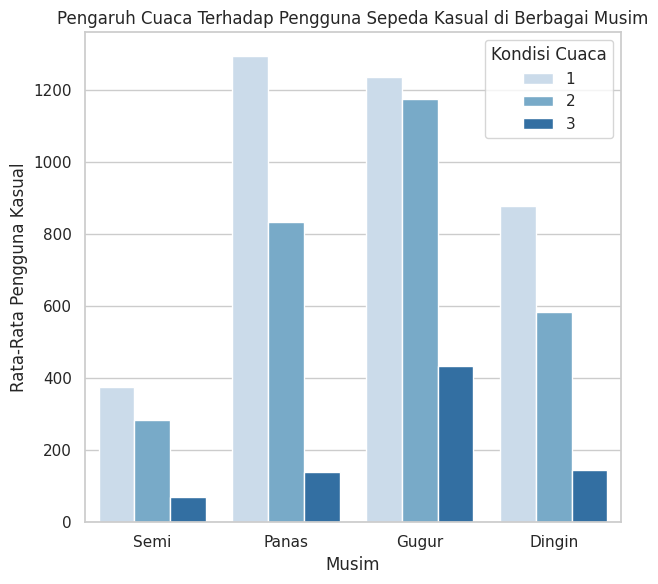

In [ ]:
weather_season_grouped = day_df.groupby(by=["season", "weathersit"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

season_mapping = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
weather_season_grouped['season'] = weather_season_grouped['season'].map(season_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="season", y="casual", hue="weathersit", data=weather_season_grouped, palette="Blues")
plt.title("Pengaruh Cuaca Terhadap Pengguna Sepeda Kasual di Berbagai Musim")
plt.ylabel("Rata-Rata Pengguna Kasual")
plt.xlabel("Musim")
plt.legend(title="Kondisi Cuaca")

plt.tight_layout()
plt.show()


**Insight:**

Penjelasan Musim:
- Musim Semi: Musim yang dipetakan ke nomor 1.
- Musim Panas: Musim yang dipetakan ke nomor 2.
- Musim Gugur: Musim yang dipetakan ke nomor 3.
- Musim Dingin: Musim yang dipetakan ke nomor 4

Pengguna Kasual:

- Musim Panas dan Musim Gugur menunjukkan jumlah pengguna kasual tertinggi, terutama ketika cuaca baik (kondisi cuaca = 1: Cerah, Sedikit Awan). Ini mengindikasikan bahwa pengguna kasual lebih mungkin menyewa sepeda saat cuaca mendukung, terutama di musim yang lebih hangat.
- Di Musim Dingin, jumlah pengguna kasual menurun drastis. Ketika cuaca buruk (kondisi cuaca = 3: Hujan ringan, Salju ringan), penggunaan sepeda oleh pengguna kasual sangat sedikit. Ini menunjukkan bahwa cuaca dingin dan buruk sangat mempengaruhi keputusan pengguna kasual untuk menggunakan sepeda.

Secara keseluruhan, pengguna kasual sangat sensitif terhadap perubahan cuaca dan musim, lebih cenderung menyewa sepeda di musim panas dan gugur, dengan penurunan tajam di musim dingin dan kondisi cuaca buruk.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


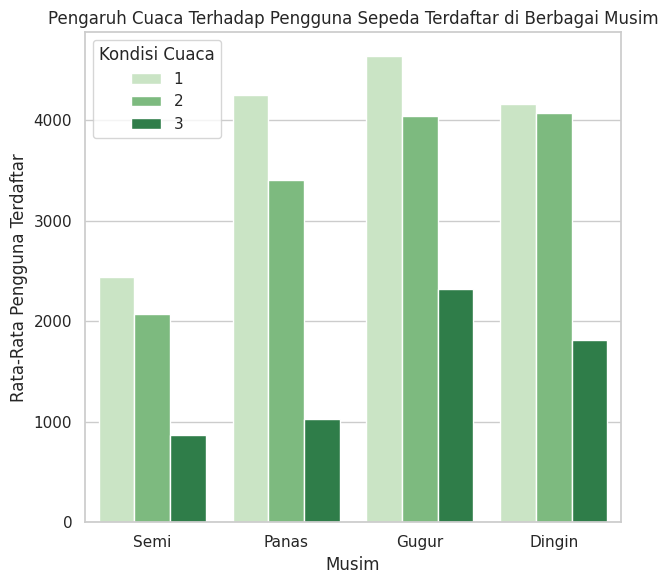

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="registered", hue="weathersit", data=weather_season_grouped, palette="Greens")
plt.title("Pengaruh Cuaca Terhadap Pengguna Sepeda Terdaftar di Berbagai Musim")
plt.ylabel("Rata-Rata Pengguna Terdaftar")
plt.xlabel("Musim")
plt.legend(title="Kondisi Cuaca")

plt.tight_layout()
plt.show()

**Insight:**

Penjelasan Musim:
- Musim Semi: Musim yang dipetakan ke nomor 1.
- Musim Panas: Musim yang dipetakan ke nomor 2.
- Musim Gugur: Musim yang dipetakan ke nomor 3.
- Musim Dingin: Musim yang dipetakan ke nomor 4

Pengguna Terdaftar:

- Pengguna terdaftar menunjukkan pola yang lebih stabil dibandingkan dengan pengguna kasual, tetapi tetap terdapat penurunan jumlah penyewaan di musim dingin dan saat cuaca buruk. Namun, penurunan ini tidak se-drastis pengguna kasual.
- Pengguna terdaftar lebih mungkin untuk terus menggunakan layanan sepeda bahkan saat kondisi cuaca tidak ideal, terutama di Musim Panas dan Musim Gugur. Hal ini menunjukkan bahwa pengguna terdaftar mungkin menggunakan sepeda untuk perjalanan rutin seperti bekerja atau kegiatan sehari-hari, yang membuat mereka lebih konsisten.

Walaupun jumlah penyewaan menurun pada cuaca buruk, pengguna terdaftar masih lebih aktif dibandingkan pengguna kasual, menunjukkan bahwa mereka mungkin memiliki motivasi yang lebih kuat (misalnya, komitmen berlangganan, transportasi harian).

### Pertanyaan 2: Apakah terdapat pola penggunaan sepeda yang signifikan antara hari kerja dan hari libur?

<ipython-input-42-40fcd651afd1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_grouped = day_df.groupby(by="workingday").agg({


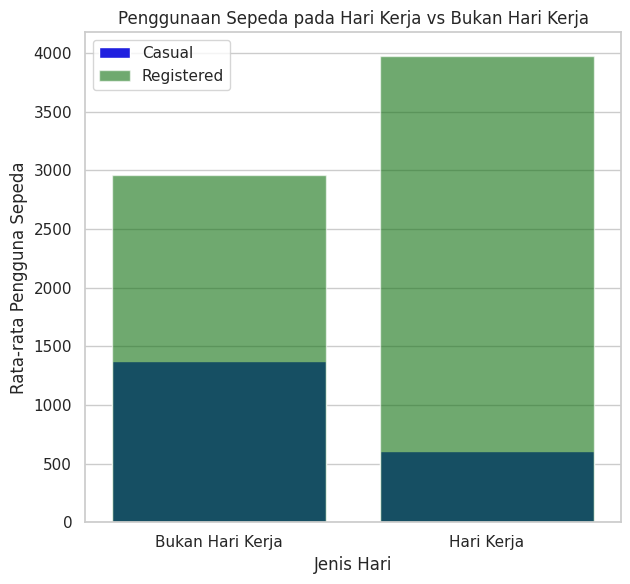

In [ ]:
day_df['workingday'] = day_df['workingday'].map({1: "Hari Kerja", 0: "Bukan Hari Kerja"})

# Grouping by working day (Hari Kerja vs Bukan Hari Kerja)
workingday_grouped = day_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))

# Subplot untuk hari kerja vs bukan hari kerja
plt.subplot(1, 2, 1)
sns.barplot(x="workingday", y="casual", data=workingday_grouped, color="blue", label="Casual")
sns.barplot(x="workingday", y="registered", data=workingday_grouped, color="green", alpha=0.6, label="Registered")
plt.title("Penggunaan Sepeda pada Hari Kerja vs Bukan Hari Kerja")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.legend()


plt.tight_layout()
plt.show()

**Insight:**

Penggunaan Sepeda pada Hari Kerja vs Bukan Hari Kerja:
- Pengguna Kasual: Lebih banyak menggunakan sepeda pada hari bukan kerja (akhir pekan) dibandingkan dengan hari kerja. Ini menunjukkan bahwa pengguna kasual cenderung menggunakan sepeda untuk rekreasi atau kegiatan santai selama akhir pekan.
- Pengguna Terdaftar: Lebih aktif pada hari kerja, menunjukkan bahwa mereka lebih sering menggunakan sepeda untuk keperluan transportasi harian seperti pergi bekerja atau kegiatan rutin.

<ipython-input-43-cd3cf409d277>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_grouped = day_df.groupby(by="holiday").agg({


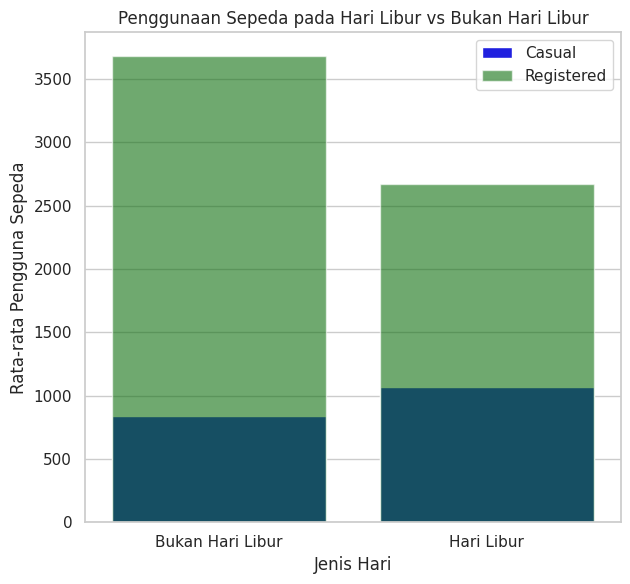

In [ ]:
day_df['holiday'] = day_df['holiday'].map({1: "Hari Libur", 0: "Bukan Hari Libur"})

# Grouping by holiday (Hari Libur vs Bukan Hari Libur)
holiday_grouped = day_df.groupby(by="holiday").agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))

# Subplot untuk hari libur vs bukan hari libur
plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="casual", data=holiday_grouped, color="blue", label="Casual")
sns.barplot(x="holiday", y="registered", data=holiday_grouped, color="green", alpha=0.6, label="Registered")
plt.title("Penggunaan Sepeda pada Hari Libur vs Bukan Hari Libur")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**

Penggunaan Sepeda pada Hari Libur vs Bukan Hari Libur:
- Pengguna Kasual: Jelas lebih banyak pengguna kasual yang menyewa sepeda pada hari libur, menunjukkan bahwa pengguna kasual memanfaatkan hari libur untuk aktivitas rekreasi.
- Pengguna Terdaftar: Tidak ada perubahan signifikan antara hari libur dan bukan hari libur untuk pengguna terdaftar, yang menunjukkan pola penggunaan yang lebih stabil.

## RFM Analysis


In [ ]:
# Menghitung Recency: Jumlah hari sejak terakhir kali menyewa sepeda
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
reference_date = day_df['dteday'].max()  # Mengambil tanggal terakhir di dataset
day_df['recency'] = (reference_date - day_df['dteday']).dt.days

rfm_data = day_df.groupby(['workingday']).agg({
    'recency': 'min',  # Mengambil nilai recency terendah
    'casual': 'sum',   # Total pengguna kasual sebagai Frequency
    'registered': 'sum'  # Total pengguna terdaftar sebagai Frequency
}).reset_index()
rfm_data

<ipython-input-44-28bf5f1de4f4>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_data = day_df.groupby(['workingday']).agg({


,workingday,recency,casual,registered
0,Bukan Hari Kerja,1,316732,683537
1,Hari Kerja,0,303285,1989125


<ipython-input-45-360be81fbc30>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_data['monetary_casual'] = day_df.groupby('workingday')['casual'].sum().values  # Jumlah total pengguna kasual pada hari kerja dan bukan hari kerja
<ipython-input-45-360be81fbc30>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_data['monetary_registered'] = day_df.groupby('workingday')['registered'].sum().values  # Jumlah total pengguna terdaftar pada hari kerja dan bukan hari kerja
<ipython-input-45-360be81fbc30>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

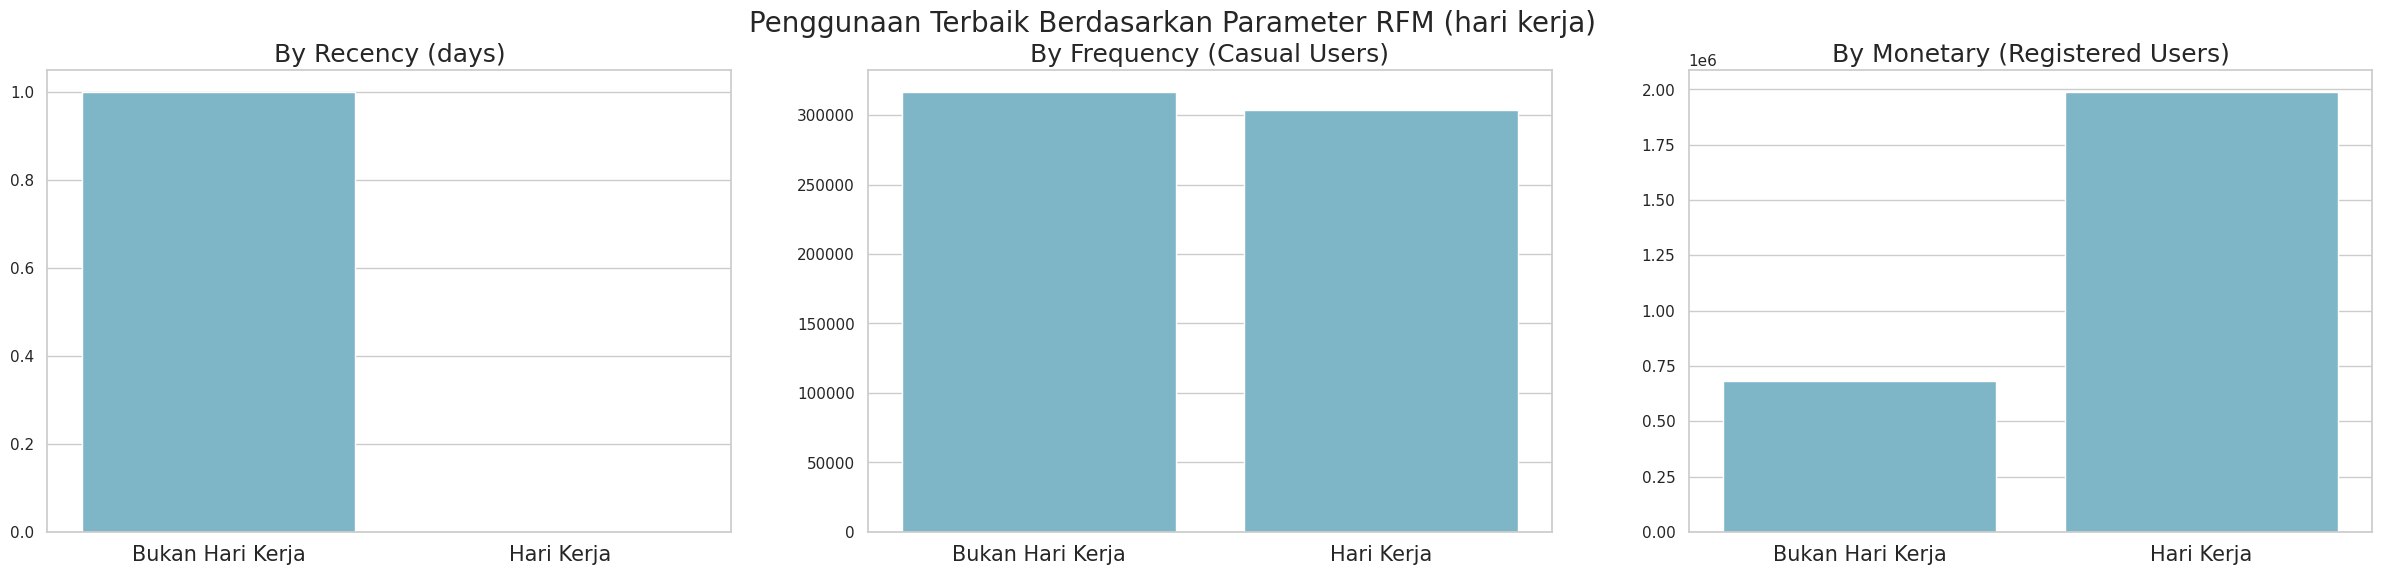

In [ ]:
# Menambahkan kolom Monetary: Total jumlah pengguna kasual dan terdaftar sebagai representasi dari monetari
rfm_data['monetary_casual'] = day_df.groupby('workingday')['casual'].sum().values  # Jumlah total pengguna kasual pada hari kerja dan bukan hari kerja
rfm_data['monetary_registered'] = day_df.groupby('workingday')['registered'].sum().values  # Jumlah total pengguna terdaftar pada hari kerja dan bukan hari kerja

# Membuat subplots dengan 3 kolom dan 1 baris dengan ukuran 30x6 untuk visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Mendefinisikan palet warna yang akan digunakan untuk visualisasi
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot 1: Barplot untuk Recency (berdasarkan jumlah hari sejak penyewaan terakhir)
sns.barplot(y="recency", x="workingday", data=rfm_data.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)  # Menghilangkan label pada sumbu Y
ax[0].set_xlabel(None)  # Menghilangkan label pada sumbu X
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)  # Memberi judul pada plot
ax[0].tick_params(axis='x', labelsize=15)  # Mengatur ukuran font label pada sumbu X

# Plot 2: Barplot untuk Frequency (berdasarkan jumlah pengguna kasual)
sns.barplot(y="casual", x="workingday", data=rfm_data.sort_values(by="casual", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)  # Menghilangkan label pada sumbu Y
ax[1].set_xlabel(None)  # Menghilangkan label pada sumbu X
ax[1].set_title("By Frequency (Casual Users)", loc="center", fontsize=18)  # Memberi judul pada plot
ax[1].tick_params(axis='x', labelsize=15)  # Mengatur ukuran font label pada sumbu X

# Plot 3: Barplot untuk Monetary (berdasarkan jumlah pengguna terdaftar)
sns.barplot(y="registered", x="workingday", data=rfm_data.sort_values(by="registered", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)  # Menghilangkan label pada sumbu Y
ax[2].set_xlabel(None)  # Menghilangkan label pada sumbu X
ax[2].set_title("By Monetary (Registered Users)", loc="center", fontsize=18)  # Memberi judul pada plot
ax[2].tick_params(axis='x', labelsize=15)  # Mengatur ukuran font label pada sumbu X

# Memberi judul keseluruhan pada visualisasi dengan ukuran font 20
plt.suptitle("Penggunaan Terbaik Berdasarkan Parameter RFM (hari kerja)", fontsize=20)

# Menampilkan visualisasi
plt.show()

**Insight**

- Recency: Menampilkan 5 status hari kerja dengan recency terendah, yaitu pengguna yang baru saja menggunakan sepeda dalam beberapa hari terakhir.
- Frequency (Kasual): Menampilkan 5 status hari kerja dengan frekuensi pengguna kasual tertinggi.
- Monetary (Terdaftar): Menampilkan 5 status hari kerja dengan penggunaan terbesar oleh pengguna terdaftar.

Insight dari Analisis:
Recency (Penggunaan Terbaru):
- Hari bukan kerja cenderung memiliki recency yang lebih tinggi, yang berarti pengguna sepeda (terutama pengguna kasual) cenderung tidak aktif di hari kerja dibandingkan pada hari libur atau akhir pekan.
- Pengguna terdaftar lebih konsisten dalam menggunakan sepeda di hari kerja, dengan frekuensi penggunaan yang lebih stabil meskipun cuaca atau kondisi tertentu berubah.

Frequency (Frekuensi Pengguna Kasual):
- Pengguna kasual lebih sering menggunakan sepeda pada hari bukan kerja (akhir pekan), yang menunjukkan pola penggunaan yang terkait dengan aktivitas rekreasi. Pengguna kasual cenderung menyewa sepeda lebih banyak pada akhir pekan untuk bersenang-senang atau jalan-jalan.

- Monetary (Pengguna Terdaftar):
Pengguna terdaftar lebih sering menggunakan sepeda pada hari kerja. Ini menunjukkan bahwa sepeda digunakan oleh pengguna terdaftar sebagai sarana transportasi sehari-hari, misalnya untuk pergi bekerja atau beraktivitas rutin.

In [ ]:
# Menambahkan ranking berdasarkan Recency, Frequency, dan Monetary
rfm_data['r_rank'] = rfm_data['recency'].rank(ascending=False)  # Semakin kecil recency, semakin tinggi rank
rfm_data['f_rank'] = rfm_data['casual'].rank(ascending=True)    # Semakin besar frequency, semakin tinggi rank
rfm_data['m_rank'] = rfm_data['registered'].rank(ascending=True)  # Semakin besar monetary, semakin tinggi rank

# Menampilkan hasil dari perhitungan rank
rfm_data.head()

,workingday,recency,casual,registered,monetary_casual,monetary_registered,r_rank,f_rank,m_rank
0,Bukan Hari Kerja,1,316732,683537,316732,683537,1.0,2.0,1.0
1,Hari Kerja,0,303285,1989125,303285,1989125,2.0,1.0,2.0


**Insight**
- r_rank: Ranking untuk Recency, semakin kecil nilai recency (artinya pengguna baru-baru ini menyewa sepeda), semakin tinggi peringkatnya.
- f_rank: Ranking untuk Frequency yang dihitung berdasarkan jumlah sewa pengguna kasual. Semakin sering mereka menyewa sepeda, semakin tinggi peringkatnya.
- m_rank: Ranking untuk Monetary, dihitung berdasarkan penggunaan sepeda oleh pengguna terdaftar. Semakin besar nilai moneternya, semakin tinggi peringkatnya

In [ ]:
# Normalisasi ranking dari Recency, Frequency, dan Monetary
rfm_data['r_rank_norm'] = (rfm_data['r_rank'] / rfm_data['r_rank'].max()) * 100
rfm_data['f_rank_norm'] = (rfm_data['f_rank'] / rfm_data['f_rank'].max()) * 100
rfm_data['m_rank_norm'] = (rfm_data['m_rank'] / rfm_data['m_rank'].max()) * 100

# Menghapus kolom r_rank, f_rank, dan m_rank
rfm_data.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

# Menampilkan hasil dari normalisasi ranking
rfm_data.head()

,workingday,recency,casual,registered,monetary_casual,monetary_registered,r_rank_norm,f_rank_norm,m_rank_norm
0,Bukan Hari Kerja,1,316732,683537,316732,683537,50.0,100.0,50.0
1,Hari Kerja,0,303285,1989125,303285,1989125,100.0,50.0,100.0


**Insight**
- r_rank_norm, f_rank_norm, dan m_rank_norm: Melakukan normalisasi ranking dengan mengubah skala ranking ke persentase (dari 0 hingga 100), sehingga memudahkan interpretasi.
- Penghapusan Kolom: Kolom r_rank, f_rank, dan m_rank dihapus setelah normalisasi, karena sudah tidak diperlukan lagi.

In [ ]:
# Menghitung RFM score dengan bobot tertentu
rfm_data['RFM_score'] = (0.15 * rfm_data['r_rank_norm']) + \
                        (0.28 * rfm_data['f_rank_norm']) + \
                        (0.57 * rfm_data['m_rank_norm'])

# Skalakan RFM score
rfm_data['RFM_score'] *= 0.05

# Membulatkan nilai RFM_score menjadi 2 desimal
rfm_data = rfm_data.round(2)

# Menampilkan hasil dengan RFM_score
rfm_data[['workingday', 'RFM_score']].head(7)

,workingday,RFM_score
0,Bukan Hari Kerja,3.2
1,Hari Kerja,4.3


In [ ]:
# Menambahkan segmentasi pelanggan berdasarkan RFM score
rfm_data["bikers_segment"] = np.where(
    rfm_data['RFM_score'] > 4.5, "Top customers",
    np.where(rfm_data['RFM_score'] > 4, "High value customer",
    np.where(rfm_data['RFM_score'] > 3, "Medium value customer",
    np.where(rfm_data['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))

# Menampilkan hasil dengan customer_id (dalam konteks Anda, kita bisa menggunakan 'workingday')
rfm_data[['workingday', 'RFM_score', 'bikers_segment']].head(20)

,workingday,RFM_score,bikers_segment
0,Bukan Hari Kerja,3.2,Medium value customer
1,Hari Kerja,4.3,High value customer


**Insight**

Segmentasi Pelanggan:
- Top customers: Pelanggan dengan RFM score lebih dari 4.5.
- High value customer: Pelanggan dengan RFM score lebih dari 4.
- Medium value customer: Pelanggan dengan RFM score lebih dari 3.
- Low value customers: Pelanggan dengan RFM score antara 1.6 dan 3.
- Lost customers: Pelanggan dengan RFM score di bawah 1.6.

np.where digunakan untuk membuat segmentasi dengan aturan bersyarat berdasarkan RFM score.

In [ ]:
# Mengelompokkan data berdasarkan segmen pelanggan dan menghitung jumlah unik
bikers_segment_df = rfm_data.groupby(by="bikers_segment", as_index=False).workingday.nunique()

# Menampilkan hasil
bikers_segment_df

,bikers_segment,workingday
0,High value customer,1
1,Medium value customer,1


In [ ]:
# Mengubah segmentasi bikers dengan urutan yang sudah ditentukan
bikers_segment_df['bikers_segment'] = pd.Categorical(bikers_segment_df['bikers_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

# Menampilkan hasil bikers_segment_df
bikers_segment_df.head()

,bikers_segment,workingday
0,High value customer,1
1,Medium value customer,1


pd.Categorical: Digunakan untuk membuat kolom customer_segment menjadi kategori dengan urutan yang sudah ditentukan.
- Urutan segmen dimulai dari "lost customers" hingga "Top customers."

- bikers_segment_df: Nama dataframe yang digunakan untuk menyimpan data hasil segmentasi bikers, berdasarkan hasil dari pengelompokan sebelumnya.

## Conclusion

1. Bagaimana Pengaruh Cuaca terhadap Jumlah Pengguna Sepeda Kasual dan Terdaftar di Berbagai Musim?
- Pengguna Kasual:
Pengguna kasual lebih sensitif terhadap cuaca dan musim. Jumlah pengguna kasual meningkat secara signifikan pada cuaca yang cerah dan kondisi baik, terutama di Musim Panas dan Musim Gugur. Sebaliknya, pada Musim Dingin dan saat cuaca buruk (misalnya, hujan atau salju ringan), pengguna kasual berkurang drastis.
- Pengguna Terdaftar:
Pengguna terdaftar lebih stabil dalam penggunaan sepeda sepanjang tahun. Meskipun cuaca buruk dan musim dingin mempengaruhi mereka, pengurangan jumlah pengguna tidak se-drastis pengguna kasual. Pengguna terdaftar lebih mungkin menggunakan sepeda untuk keperluan transportasi harian seperti bekerja, sehingga mereka tidak terlalu terpengaruh oleh cuaca dibandingkan pengguna kasual.

- Kesimpulan Utama:
Cuaca baik dan musim hangat (Musim Panas dan Musim Gugur) mendorong lebih banyak penggunaan sepeda, terutama oleh pengguna kasual.
Musim Dingin dan cuaca buruk berdampak signifikan pada penurunan jumlah pengguna kasual, sementara pengguna terdaftar lebih cenderung tetap aktif meskipun dengan sedikit penurunan.

2. Apakah Terdapat Pola Penggunaan Sepeda yang Signifikan antara Hari Kerja dan Hari Libur?
- Pengguna Kasual:
Pengguna kasual lebih aktif pada hari bukan kerja (akhir pekan) dan hari libur. Hal ini menunjukkan bahwa pengguna kasual menggunakan sepeda terutama untuk aktivitas rekreasi dan santai, yang biasanya dilakukan pada waktu luang.
- Pengguna Terdaftar:
Pengguna terdaftar lebih aktif pada hari kerja dibandingkan hari libur atau akhir pekan. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk keperluan harian, seperti pergi bekerja atau kegiatan rutin lainnya. Perbedaan antara hari kerja dan hari libur tidak signifikan bagi mereka.

- Kesimpulan Utama:
Pengguna kasual lebih aktif di akhir pekan dan hari libur, yang menunjukkan bahwa penggunaan sepeda oleh mereka lebih terkait dengan rekreasi.
Pengguna terdaftar lebih sering menggunakan sepeda di hari kerja, yang menunjukkan bahwa mereka menggunakan sepeda sebagai alat transportasi harian.

In [ ]:
# Menggabungkan data menjadi satu dataframe
all_df = pd.concat([rfm_data, bikers_segment_df], axis=1)

# Menyimpan dataframe ke CSV
all_df.to_csv("all_data.csv", index=False)

- pd.concat(): Digunakan untuk menggabungkan beberapa dataframe jika diperlukan.
- .to_csv(): Menyimpan dataframe yang diinginkan ke dalam file CSV.